In [61]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [62]:
####################### Exercise 1.1
# We load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [63]:
# We combine training and test data together and normalize them
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
X = np.concatenate((x_train, x_test), axis=0).astype('float32')/255.0

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
Y = np.concatenate((y_train, y_test), axis=0).astype('float32')/255.0

In [64]:
# Split dataset into 80:10:10 (train:validation:test)
X_train, X_rem, Y_train, y_rem = train_test_split(X,Y, train_size=0.8)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# X_train shape (48000, 32, 32, 3)
# X_valid shape (6000, 32, 32, 3)
# X_test shape (6000, 32, 32, 3)

In [65]:
####################### Exercise 1.2
def plotLoss(hist,saveTo, loss, label, x, y):
    # Plot the training loss
    loss_values = hist.history[loss]
    epochs = range(1, len(loss_values)+1)

    plt.plot(epochs, loss_values, label=label)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

    plt.show()
    plt.savefig(saveTo)

    
def trainNetwork(loss_fnc, epochs, saveTo):
    #  Construct the CAE
    img = keras.Input(shape=(32,32, 3))

    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same',strides=1)(img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(12, (3, 3), activation='relu', padding='same',strides=1)(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same',strides=1)(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(12, (3, 3), activation='relu', padding='same',strides=1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same',strides=1)(x)

    autoencoder = keras.Model(img, decoded)
    autoencoder.compile(optimizer='adam', loss=loss_fnc)
    
    # Fit the model and save it
    hist = autoencoder.fit(X_train, X_train,
                epochs=epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(X_valid, X_valid),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    
    autoencoder.save(saveTo)
    
    # Also provide an encoder to see what the images are encoded into
    encoder = keras.Model(img, encoded)
    
    return (autoencoder, hist, encoder)

Epoch 1/10
375/375 [==============================] - 22s 59ms/step - loss: 0.0174 - val_loss: 0.0090
Epoch 2/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 3/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 4/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 5/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 6/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 7/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 8/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 9/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 10/10
375/375 [==============================] - 21s 55ms/step - loss: 0.005

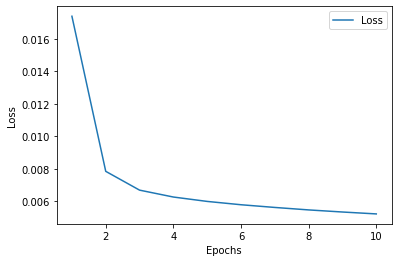

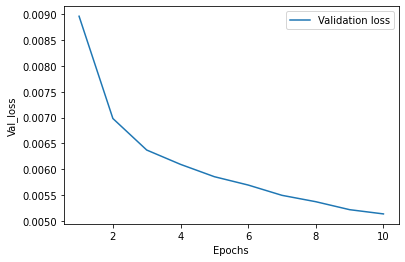

<Figure size 432x288 with 0 Axes>

In [25]:
# With MSE
(model, hist, encoder) = trainNetwork('mean_squared_error', 10, '.part_one/ex_1_2_mse')
plotLoss(hist,'./part_one/1_2_mse_loss.png', 'loss', 'Loss','Epochs','Loss')
plotLoss(hist,'./part_one/1_2_mse_val_loss.png', 'val_loss', 'Validation loss','Epochs','Val_loss')
# Loss = 0.0053, validation loss = 0.0053

47/47 [==============================] - 1s 15ms/step - loss: 0.0052


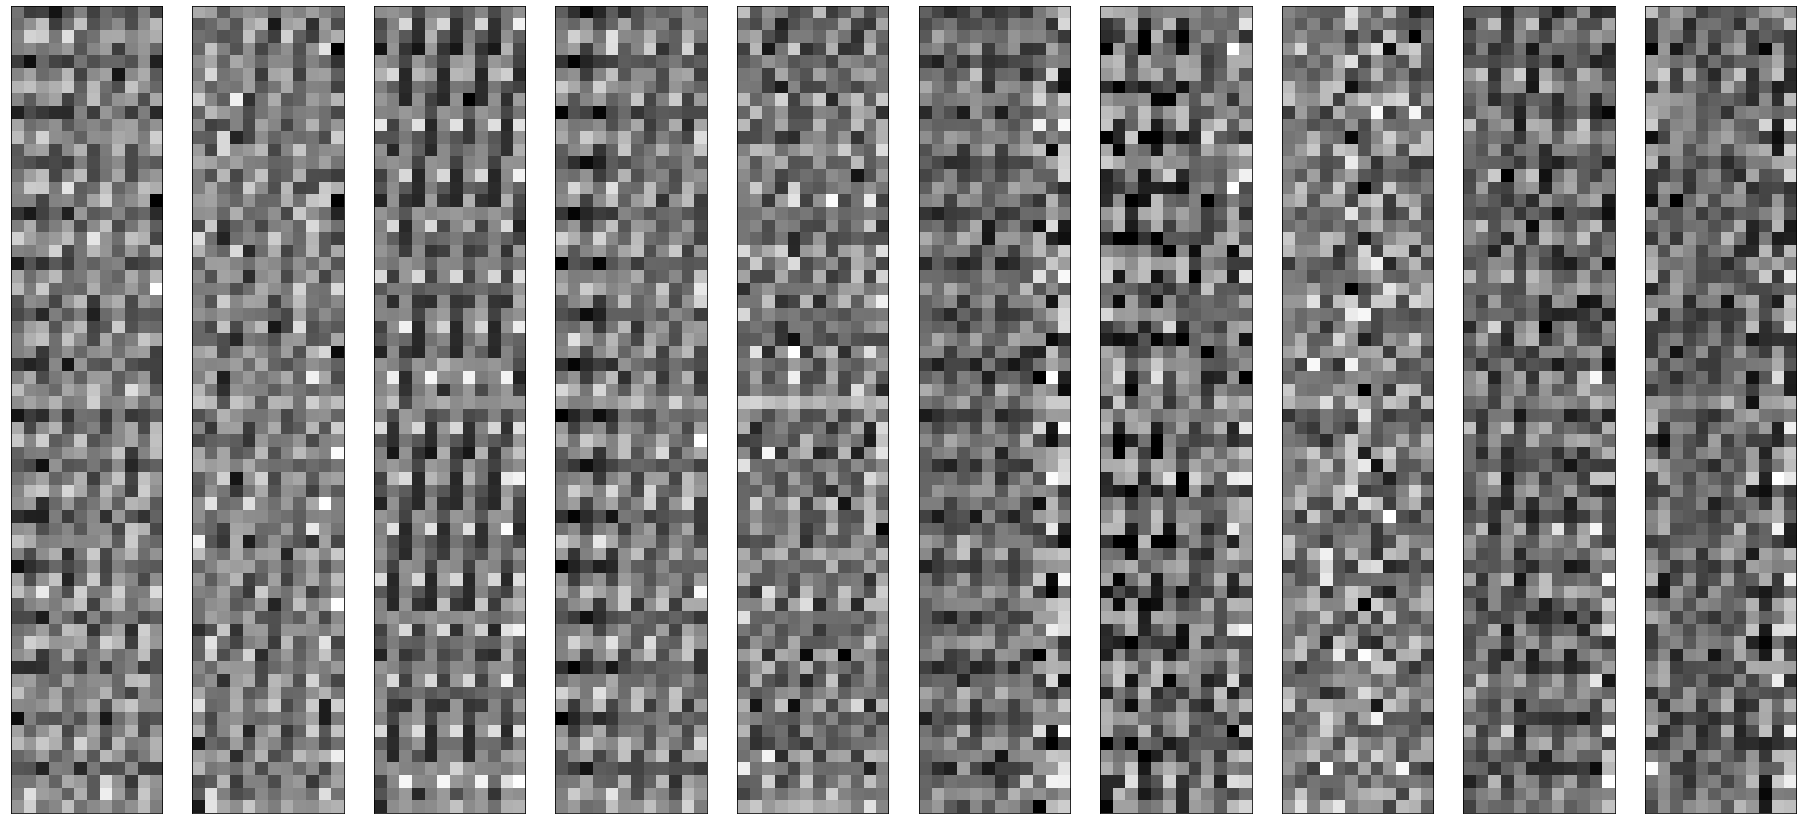

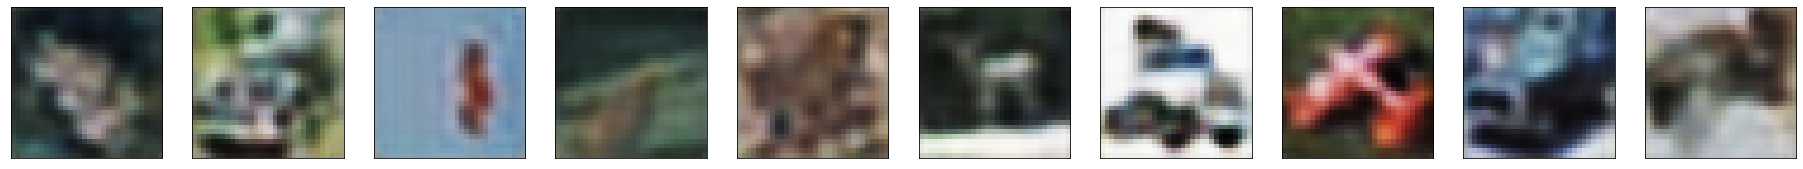

In [55]:
# We evaluate the model on the test dataset
test_loss = model.evaluate(X_test, X_test, batch_size=128)
# test loss = 0.0052

# Examples of encoded and decoded images 
encoded_imgs = encoder.predict(X_test)
decoded_imgs = model.predict(X_test)

def showImages(imgs, n, w, h, c, reshape=True):
    plt.figure(figsize=(32, 32))
    for i in range(1, n + 1):
        ax = plt.subplot(1, n, i)
        im = imgs[i]
        if reshape:
            im = imgs[i].reshape((c, h * w)).T 
        plt.imshow(im)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
showImages(encoded_imgs, 10, 8,8,12)
showImages(decoded_imgs, 10, 32,32,3, reshape=False)


Epoch 1/10
375/375 [==============================] - 22s 58ms/step - loss: 0.5889 - val_loss: 0.5730
Epoch 2/10
375/375 [==============================] - 22s 58ms/step - loss: 0.5694 - val_loss: 0.5677
Epoch 3/10
375/375 [==============================] - 21s 56ms/step - loss: 0.5662 - val_loss: 0.5657
Epoch 4/10
375/375 [==============================] - 22s 58ms/step - loss: 0.5647 - val_loss: 0.5647
Epoch 5/10
375/375 [==============================] - 24s 65ms/step - loss: 0.5637 - val_loss: 0.5637
Epoch 6/10
375/375 [==============================] - 24s 65ms/step - loss: 0.5630 - val_loss: 0.5631
Epoch 7/10
375/375 [==============================] - 22s 59ms/step - loss: 0.5624 - val_loss: 0.5626
Epoch 8/10
375/375 [==============================] - 22s 59ms/step - loss: 0.5619 - val_loss: 0.5623
Epoch 9/10
375/375 [==============================] - 22s 58ms/step - loss: 0.5616 - val_loss: 0.5619
Epoch 10/10
375/375 [==============================] - 22s 58ms/step - loss: 0.561

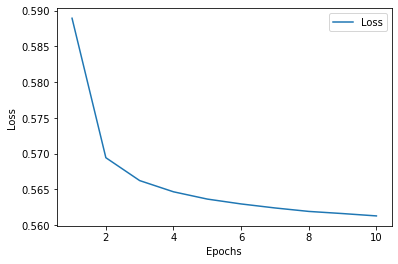

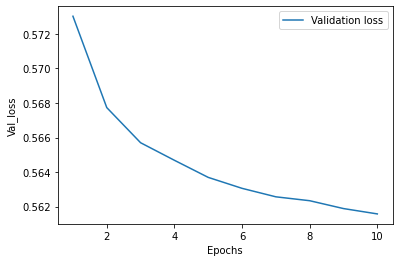

<Figure size 432x288 with 0 Axes>

In [49]:
# With binary cross entropy
(model2, hist2, encoder2) = trainNetwork('binary_crossentropy', 10, './part_one/ex_1_2_bce')
plotLoss(hist2,'./part_one/1_2_bce_loss.png', 'loss', 'Loss','Epochs','Loss')
plotLoss(hist2,'./part_one/1_2_bce_val_loss.png', 'val_loss', 'Validation loss','Epochs','Val_loss')
# Loss = 0.5609 | validation loss = 0.5606    -> bigger loss than with MSE

In [50]:
# We evaluate the second model on the test dataset
test_loss = model2.evaluate(X_test, X_test, batch_size=128)
# test loss = 0.5614

47/47 [==============================] - 1s 16ms/step - loss: 0.5614


In [8]:
####################### Exercise 2.1
# What is the size of the latent space representation of the above network?

# There are 2 max_pooling layers of (2x2), which means the input volume (W)
# to our latent space representation is going to be 8x8x12

# W = 8, K = 3, P=S=1, C = 16
# Size of latent space representation = (8)^2 * 16 = 64 * 16 = 1024

####################### Exercise 2.2

# Experimentation function
def experiment(loss_fnc, epochs, saveTo):    
    img = keras.Input(shape=(32,32, 3))

    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same',strides=1)(img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(12, (3, 3), activation='relu', padding='same',strides=1)(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same',strides=1)(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(12, (3, 3), activation='relu', padding='same',strides=1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same',strides=1)(x)

    autoencoder = keras.Model(img, decoded)
    autoencoder.compile(optimizer='adam', loss=loss_fnc)
    
    # Fit the model and save it
    hist = autoencoder.fit(X_train, X_train,
                epochs=epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(X_valid, X_valid),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    
    autoencoder.save(saveTo)
    
    # Also provide an encoder to see what the images are encoded into
    encoder = keras.Model(img, encoded)
    
    return (autoencoder, hist, encoder)

(m, hist, enc) = experiment("mean_squared_error", 10, "./part_two/experiment_13")

# In experiment 1, we removed the second convolutional and max pooling layers in the 
# encoder and the decoder. All of the parameters stayed the exacly like 
# in the original model. The size of the LS (latent space) was 4096.
# The testing error was 0.0018

# In experiment 2, we had the same architecture as in experiment 1, but this time 
# we reduced the size of LS by using a (4,4) window in pooling and upscaling layers.
# We did this so we got the same size of the LS as in the original network, which was 1024.
# The testing error this time was 0.0081.

# In experiment 3, we added another convolutional and pooling/upsampling layers to the 
# original architecture with the same configurations as the layers before them.
# Size of LS was 256 and the testing error was 0.0116. 

# In experiment 4, we added an additional conv layer to encoder before last pooling layer 
# in the original architecture, LS stayed the same at 1024
# The testing error was 0.0052 -> the error did not change

# In experiment 5, we added an additional conv layer to encoder and decoder layer 
# in the original architecture, LS stayed the same at 1024
# The testing error was 0.0053 -> the error was a bit worse

# In experiment 6, we doubled the amount of convolutional layers in encoder and decoder
# before each upsampling/pooling layer.
# LS size was still 1024.
# The testing error was 0.0052 -> the error again did not change

# In experiment 7, we had the same architecture as in experiment 6, but this time we 
# increased the size of LS to 4096 (we removed a pooling and an upscaling layer).
# The testing error was 0.0019 -> bigger than in experiment 1

# Now we experiment with num of channels -> this is done on original network architecture

# In experiment 8, we decreased the number of channels used in convolutional layers 
# by half (except in last conv layer). Size of LS was 512, testing error was 0.0071.

# In experiment 9, we increased the number of channels used in conv layers by half (except
# in last one). Size of LS was 2048 and the testing error was 0.0044

# Now we experiment with filter sizes -> this is done on original network architecture

# In experiment 10 we decreased the filter sizes to (1,1), making the size of LS 16384
# The testing error was 4.4295e-04

# In experiment 11 we increased filter sizes to (4,4), making the size of LS 64
# The testing error was 0.0208

# Now we experiment with stride sizes -> this is done on original network architecture

# In experiment 12 we increased strides to 2 in every layer, making the size of LS 36
# The testing error converged quickly and ended up at 0.0445 -> why is that? 
# (What does strides actually do?) -> need to check this to explain it

# Now we experiment with padding -> this is done on original network architecture
# There are only two values possible (same and valid) (valid means no padding...)

# In experiment 13 we changed the padding to valid on every conv layer and pooling layer
# I get an error here when training (will look at this once again later) 

    

2021-11-09 16:22:20.482832: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 589824000 exceeds 10% of free system memory.


Epoch 1/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0167 - val_loss: 0.0093
Epoch 2/10
375/375 [==============================] - 19s 51ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 3/10
375/375 [==============================] - 19s 52ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 4/10
375/375 [==============================] - 19s 51ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 5/10
375/375 [==============================] - 19s 51ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 6/10
375/375 [==============================] - 20s 53ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 7/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 8/10
375/375 [==============================] - 20s 53ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 9/10
375/375 [==============================] - 20s 53ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 10/10
375/375 [==============================] - 20s 53ms/step - loss: 0.005

2021-11-09 16:25:38.831994: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./part_two/experiment_13/assets


In [95]:
test_loss = m.evaluate(X_test, X_test, batch_size=128)
m.summary()


47/47 [==============================] - 0s 4ms/step - loss: 0.0445
Model: "model_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_163 (Conv2D)         (None, 16, 16, 8)         224       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_164 (Conv2D)         (None, 4, 4, 12)          876       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 2, 2, 12)         0         
 g2D)                                                            
                                                        

In [14]:
########################### Exercise 3.1

In [94]:
def translateToGray(image):
    image_g = np.copy(image)

    r = image_g[:,:,0]
    g = image_g[:,:,1]
    b = image_g[:,:,2]
    gray_values = (r + g + b)/3
    return np.expand_dims(gray_values, axis = -1)

In [95]:
def convertDataset(images, translate):
    X = []
    for image in images:
        X.append(translate(image))
    X = np.asarray(X)
    return X



In [96]:
X_train_gray = convertDataset(X_train, translateToGray)
X_valid_gray = convertDataset(X_valid, translateToGray)
X_test_gray = convertDataset(X_test, translateToGray)


In [98]:
def translateToChrominance(image):
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    
    image_c = np.copy(image)

    s = r + g + b    
    image_c[:,:,0] = r/s
    image_c[:,:,1] = g/s
    image_c[:,:,2] = b/s

    # Replace nan values with 0
    image_c[np.isnan(image_c)] = 0    
    return image_c

In [122]:
X_train_c = convertDataset(X_train, translateToChrominance)
X_valid_c = convertDataset(X_valid, translateToChrominance)
X_test_c = convertDataset(X_test, translateToChrominance)

X_train_c = np.nan_to_num(X_train_c,0)
X_valid_c = np.nan_to_num(X_valid_c,0)
X_test_c = np.nan_to_num(X_test_c,0)

/tmp/ipykernel_8652/677207814.py:9: RuntimeWarning: invalid value encountered in true_divide
  image_c[:,:,0] = r/s
/tmp/ipykernel_8652/677207814.py:10: RuntimeWarning: invalid value encountered in true_divide
  image_c[:,:,1] = g/s
/tmp/ipykernel_8652/677207814.py:11: RuntimeWarning: invalid value encountered in true_divide
  image_c[:,:,2] = b/s


In [146]:
def color_model(loss_fnc, epochs, saveTo, X,Y, Xv, Yv):    
    img = keras.Input(shape=(32,32, 1))

    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same',strides=2)(img)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same',strides=2)(x)
    encoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(img, decoded)
    autoencoder.compile(optimizer='adam', loss=loss_fnc)
    
    # Fit the model and save it
    hist = autoencoder.fit(X, Y,
                epochs=epochs,
                batch_size=128,
                shuffle=True,
                validation_data=(Xv, Yv),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    
    autoencoder.save(saveTo)
    
    # Also provide an encoder to see what the images are encoded into
    encoder = keras.Model(img, encoded)
    
    return (autoencoder, hist, encoder)

(m, hist, enc) = color_model("mean_squared_error", 10, "./part_three/color_model", X_train_gray, X_train_c,
                            X_valid_gray, X_valid_c)

Epoch 1/10
375/375 [==============================] - 66s 174ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 2/10
375/375 [==============================] - 68s 181ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 3/10
375/375 [==============================] - 63s 169ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 4/10
375/375 [==============================] - 64s 170ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/10
375/375 [==============================] - 64s 170ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 6/10
375/375 [==============================] - 63s 169ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 7/10
375/375 [==============================] - 63s 168ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/10
375/375 [==============================] - 62s 167ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/10
375/375 [==============================] - 62s 167ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 10/10
375/375 [==============================] - 62s 164ms/step - l

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


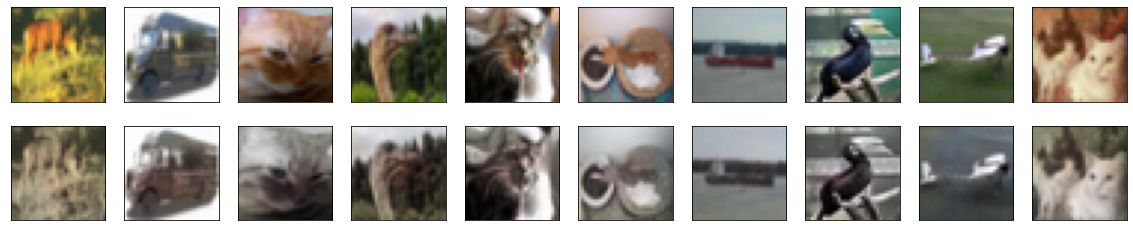

In [148]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    #print((autoencoder.predict(X_test_g)[i]*X_test_g[i]*3).reshape(32, 32, 3)[(autoencoder.predict(X_test_g)[i]*X_test_g[i]*3).reshape(32, 32, 3)>1])
    plt.imshow((m.predict(X_test_gray)[i]*X_test_gray[i]*3).reshape(32, 32, 3))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



